# El Proceso de Análisis de Datos en Jupyter Notebook

## 1. Definición del Problema
- Establece objetivos claros y medibles
- Forma un equipo interdisciplinario
- Documenta las preguntas clave a responder

Ejemplo:

In [30]:
# Definición del problema
problema = """
Objetivo: Analizar las ventas mensuales de una tienda en línea
Preguntas clave:
1. ¿Cuál es la tendencia de ventas en los últimos 12 meses?
2. ¿Qué productos son los más vendidos?
3. ¿Existe alguna estacionalidad en las ventas?
"""
print(problema)


Objetivo: Analizar las ventas mensuales de una tienda en línea
Preguntas clave:
1. ¿Cuál es la tendencia de ventas en los últimos 12 meses?
2. ¿Qué productos son los más vendidos?
3. ¿Existe alguna estacionalidad en las ventas?



## 2. Extracción de Datos
- Identifica y accede a fuentes de datos relevantes
- Utiliza APIs, bases de datos o archivos según sea necesario
- Considera Web Scraping para datos web no estructurados

Ejemplo:

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos del archivo CSV
oceano_df = pd.read_csv('./datos/temperatura_oceano.csv')

# Mostrar las primeras filas del DataFrame
print("Primeras filas del conjunto de datos:")
print(oceano_df.head())



Primeras filas del conjunto de datos:
        fecha  profundidad  temperatura  salinidad  oxigeno_disuelto
0  2023-01-01   164.265798    25.277250  35.199887          4.649985
1  2023-01-01   176.528032    23.048905  35.241471          4.457954
2  2023-01-01   374.540119    22.273810  35.389784          4.087915
3  2023-01-01   386.102638    24.407527  35.439212          3.784329
4  2023-01-01   393.864406    20.565936  35.470789          3.793302



## 3. Preparación de Datos
- Limpia datos: maneja valores nulos, elimina duplicados
- Normaliza y estandariza datos según sea necesario
- Transforma datos al formato adecuado para el análisis

Ejemplo:

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

print("\nInformación del DataFrame antes de la preparación:")
print(oceano_df.info())

# 1. Limpieza de datos
# Manejar valores nulos
print("\nValores nulos antes de la limpieza:")
print(oceano_df.isnull().sum())
oceano_df= oceano_df.dropna()
print("\nValores nulos después de la limpieza:")
print(oceano_df.isnull().sum())


Información del DataFrame antes de la preparación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha             1825 non-null   object 
 1   profundidad       1825 non-null   float64
 2   temperatura       1825 non-null   float64
 3   salinidad         1825 non-null   float64
 4   oxigeno_disuelto  1825 non-null   float64
dtypes: float64(4), object(1)
memory usage: 71.4+ KB
None

Valores nulos antes de la limpieza:
fecha               0
profundidad         0
temperatura         0
salinidad           0
oxigeno_disuelto    0
dtype: int64

Valores nulos después de la limpieza:
fecha               0
profundidad         0
temperatura         0
salinidad           0
oxigeno_disuelto    0
dtype: int64


## 4. Exploración/Visualización
- Analiza estadísticas descriptivas
- Crea visualizaciones para identificar patrones y relaciones
- Utiliza gráficos como histogramas, diagramas de dispersión, etc.

Ejemplo:

       profundidad  temperatura    salinidad  oxigeno_disuelto
count  1825.000000  1825.000000  1825.000000       1825.000000
mean    497.175091    21.760324    35.496726          3.326879
std     293.186572     2.444769     0.307196          1.301074
min       4.632023    15.743067    34.806663          0.649554
25%     236.870559    19.973893    35.247117          2.241764
50%     503.136259    21.789566    35.505528          3.316029
75%     749.960470    23.482143    35.746904          4.450521
max     999.717673    27.784199    36.204962          6.131707


<Figure size 1200x600 with 0 Axes>

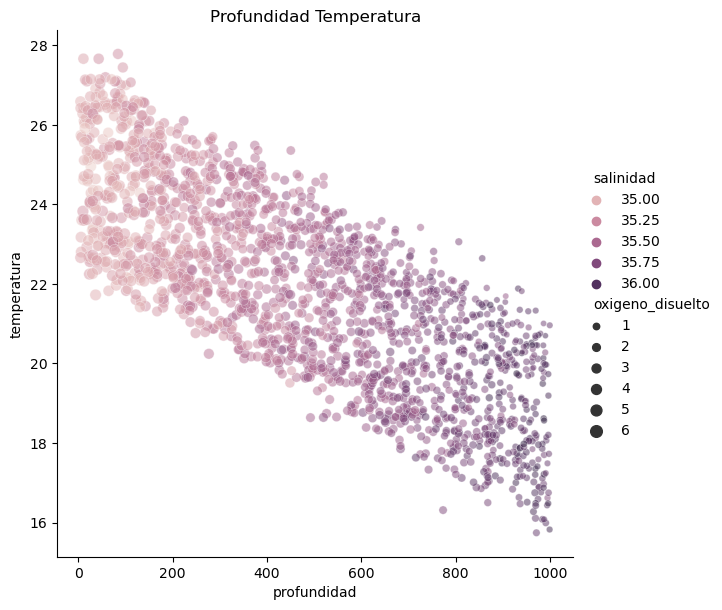

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas
print(oceano_df.describe())

# Gráfico de ventas mensuales
plt.figure(figsize=(12,6))

#  hue="origin", size="weight", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=mpg
sns.relplot(x='profundidad', y='temperatura', hue="salinidad", size="oxigeno_disuelto", alpha=.5, height=6, data=oceano_df)
plt.title('Profundidad Temperatura')
plt.show()

## 5. Modelado Predictivo
- Selecciona el tipo de modelo apropiado (clasificación, regresión, clustering)
- Prepara los datos para el modelado (división en conjuntos de entrenamiento y prueba)
- Entrena y ajusta el modelo

Ejemplo (Regresión Lineal):

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparar datos
x = oceano_df[['profundidad']]
y = oceano_df['temperatura']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = LinearRegression()
model.fit(x_train, y_train)

# Predecir
y_pred = model.predict(x_test)

# Evaluar modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R2: {r2}")

MSE: 2.1968755266580136, R2: 0.6012776725902538


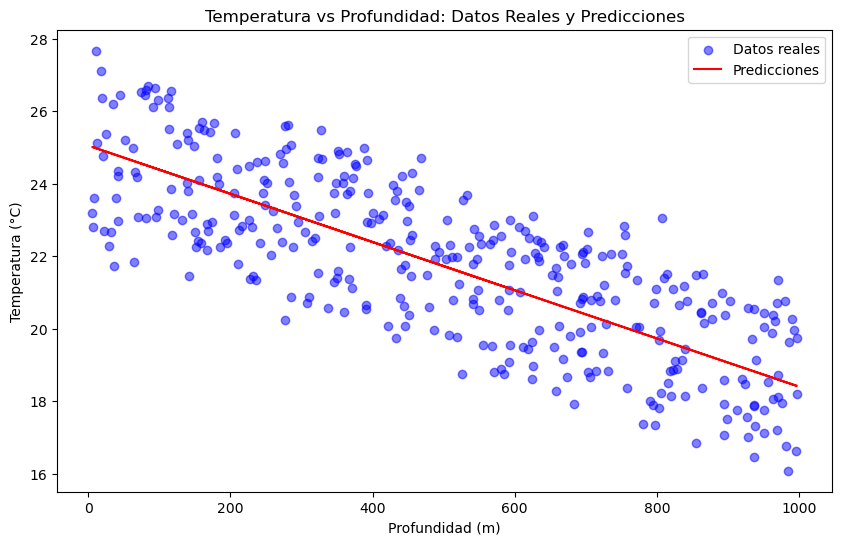

In [75]:
# Visualizar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Profundidad (m)')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura vs Profundidad: Datos Reales y Predicciones')
plt.legend()
plt.show()


## 6. Validación del Modelo
- Evalúa el rendimiento del modelo con datos de prueba
- Utiliza técnicas como validación cruzada para robustecer la evaluación
- Ajusta hiperparámetros si es necesario

Ejemplo:

In [76]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
cv_scores = cross_val_score(model, x, y, cv=5)
print(f"Puntuaciones de validación cruzada: {cv_scores}")
print(f"Media de puntuaciones: {cv_scores.mean()}")

Puntuaciones de validación cruzada: [0.63120473 0.61333293 0.61578796 0.62632882 0.63509992]
Media de puntuaciones: 0.6243508738168243


## 7. Despliegue
- Presenta resultados y conclusiones de manera clara y concisa
- Visualiza predicciones y comparaciones con datos reales
- Proporciona recomendaciones basadas en los hallazgos


Ejemplo:

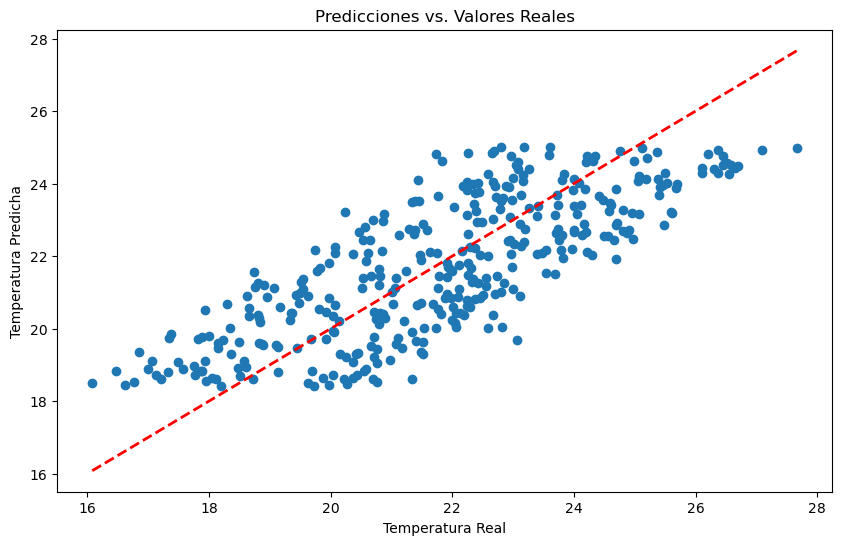




Recomendaciones:




In [79]:
# Visualizar predicciones vs. reales
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Temperatura Real')
plt.ylabel('Temperatura Predicha')
plt.title('Predicciones vs. Valores Reales')
plt.show()

# Conclusiones y recomendaciones
conclusiones = """


Recomendaciones:

"""
print(conclusiones)